
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [11]:
## library imports here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [4]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.72      0.57        32
           1       0.00      0.00      0.00        13
           2       0.23      0.14      0.17        22
           3       0.00      0.00      0.00         2

    accuracy                           0.38        69
   macro avg       0.18      0.21      0.18        69
weighted avg       0.29      0.38      0.32        69

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        32
           1       0.22      0.15      0.18        13
           2       0.33      0.05      0.08        22
           3       0.00      0.00      0.00         2

    accuracy                           0.39        69
   macro avg       0.26      0.24      0.22        69
weighted avg       0.38      0.39      0.34        69



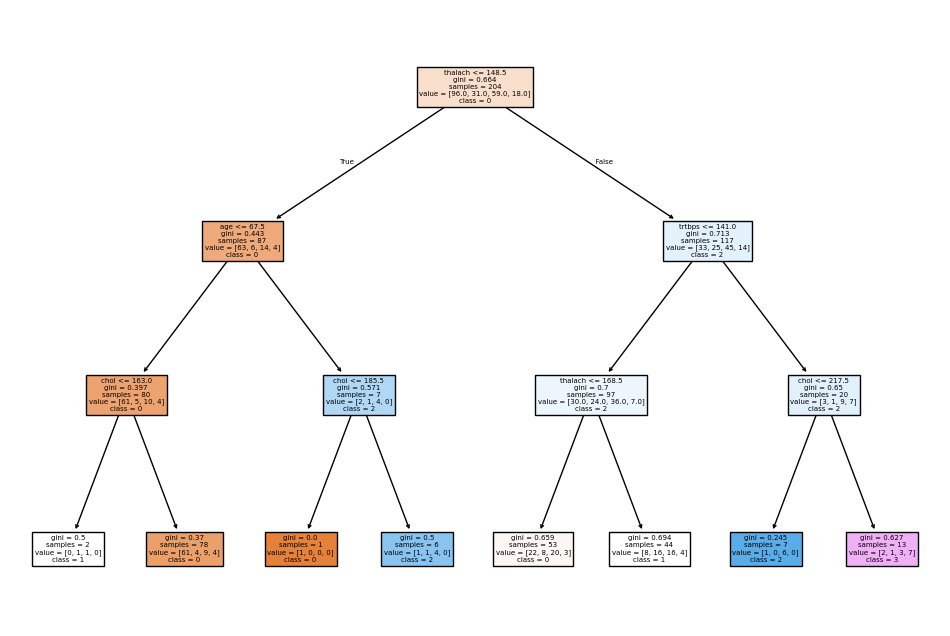

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.84      0.65        32
           1       0.00      0.00      0.00        13
           2       0.47      0.32      0.38        22
           3       0.00      0.00      0.00         2

    accuracy                           0.49        69
   macro avg       0.25      0.29      0.26        69
weighted avg       0.39      0.49      0.42        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
X = ha[['age', 'trtbps', 'chol', 'thalach', 'restecg']]
y = ha['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_pred))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True)
plt.show()

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
print("LDA Classification Report:")
print(classification_report(y_test, lda_pred))

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [8]:
for category in range(4):
    ha[f'cp_is_{category}'] = (ha['cp'] == category).astype(int)

f1_scores = {}
for category in range(4):
    y_binary = ha[f'cp_is_{category}']
    X = ha[['age', 'trtbps', 'chol', 'thalach', 'restecg']]

    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.25, random_state=42)

    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    f1_scores[f'cp_is_{category}'] = f1

print("F1 scores for Log Reg:")
print(f1_scores)

F1 scores for Log Reg:
{'cp_is_0': 0.6060606060606061, 'cp_is_1': 0.0, 'cp_is_2': 0.0, 'cp_is_3': 0.0}


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [13]:
roc_auc_results = {}

for category1 in range(4):
    for category2 in range(category1 + 1, 4):
        pair_data = ha[(ha['cp'] == category1) | (ha['cp'] == category2)]
        X = pair_data[['age', 'trtbps', 'chol', 'thalach', 'restecg']]
        y = pair_data['cp'].replace({category1: 0, category2: 1})

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(X_train, y_train)
        y_prob = logreg.predict_proba(X_test)[:, 1]

        roc_auc = roc_auc_score(y_test, y_prob)
        roc_auc_results[f'{category1} vs {category2}'] = roc_auc

print("ROC-AUC Scores for OvO Log Reg:")
print(roc_auc_results)

ROC-AUC Scores for OvO Log Reg:
{'0 vs 1': 0.6625615763546798, '0 vs 2': 0.7833333333333333, '0 vs 3': 0.8650793650793651, '1 vs 2': 0.6153846153846154, '1 vs 3': 0.5666666666666667, '2 vs 3': 0.7}
